## Whole Genome Sequenced Mycobacterium bovis analysis for BTBgenie.

Note: the current version of the M.bovis genome online has genes missing in the annotation. See https://www.ncbi.nlm.nih.gov/nuccore/LT708304.1?report=graph

Updated files can be found here: https://github.com/dmnfarrell/gordon-group/tree/master/mbovis_annotation

links:

* https://github.com/JosephCrispell/GeneralTools/tree/master/ProcessingPipeline


In [21]:
import sys,os,shutil,subprocess
import glob
from importlib import reload
import pandas as pd
import pylab as plt
from Bio import SeqIO
sys.path.append('pathogenie')
from pathogenie import tools, aligners

### Examine FASTQ file quality and define trimming parameters

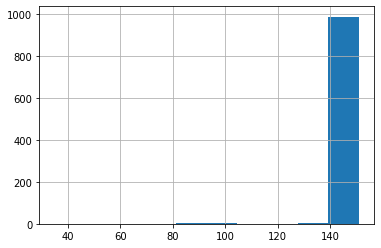

In [38]:
reload(tools)
testfile='albania/3_S57_L001-4_R1_001.fastq.gz'
df = tools.fastq_to_dataframe(testfile)
df.length.hist()

In [39]:
tools.get_fastq_info(testfile)

{'label': '3_S57_L001-4_R1_001',
 'filename': 'albania/3_S57_L001-4_R1_001.fastq.gz',
 'read_length': 149}

In [43]:
reload(tools)
tools.trim_adapters(testfile, 'trimmed.fastq.gz')

cutadapt -O 5 -q 20 albania/3_S57_L001-4_R1_001.fastq.gz -o trimmed.fastq.gz


### Align the FASTQ files against reference and create VCF files

In [ ]:
reload(aligners)
path = 'albania'
files = glob.glob(os.path.join(path,'*.fastq.gz'))
print (files)
fname = os.path.basename(files[0]).split('.')[0]
print (fname)
outdir = 'mapped'
out = os.path.join(outdir,fname+'.bam')
aligners.bwa_align(files[0],files[1], idx='pathogenie/data/Mbovis_AF212297.fa', out=out, threads=8)


### Merge the VCF files together

In [ ]:
def merge_vcf():
    return

### Filter the merged VCF file

In [ ]:
def filter_merged():
    return

### Rescuing site information for poorer quality isolates